In [1]:
import pandas as pd

In [59]:
gender = pd.read_csv('gender_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
gender.shape, train.shape, test.shape

((418, 2), (891, 12), (418, 11))

In [71]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [72]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,2,38,1,0,71.2833,1
3,1,1,2,35,1,0,53.1000,3
6,0,1,1,54,0,0,51.8625,3
10,1,3,2,4,1,1,16.7000,3
11,1,1,2,58,0,0,26.5500,3


In [73]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34,0,0,7.8292,2
1,3,2,47,1,0,7.0000,3
2,2,1,62,0,0,9.6875,2
3,3,1,27,0,0,8.6625,3
4,3,2,22,1,1,12.2875,3


In [14]:
test.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

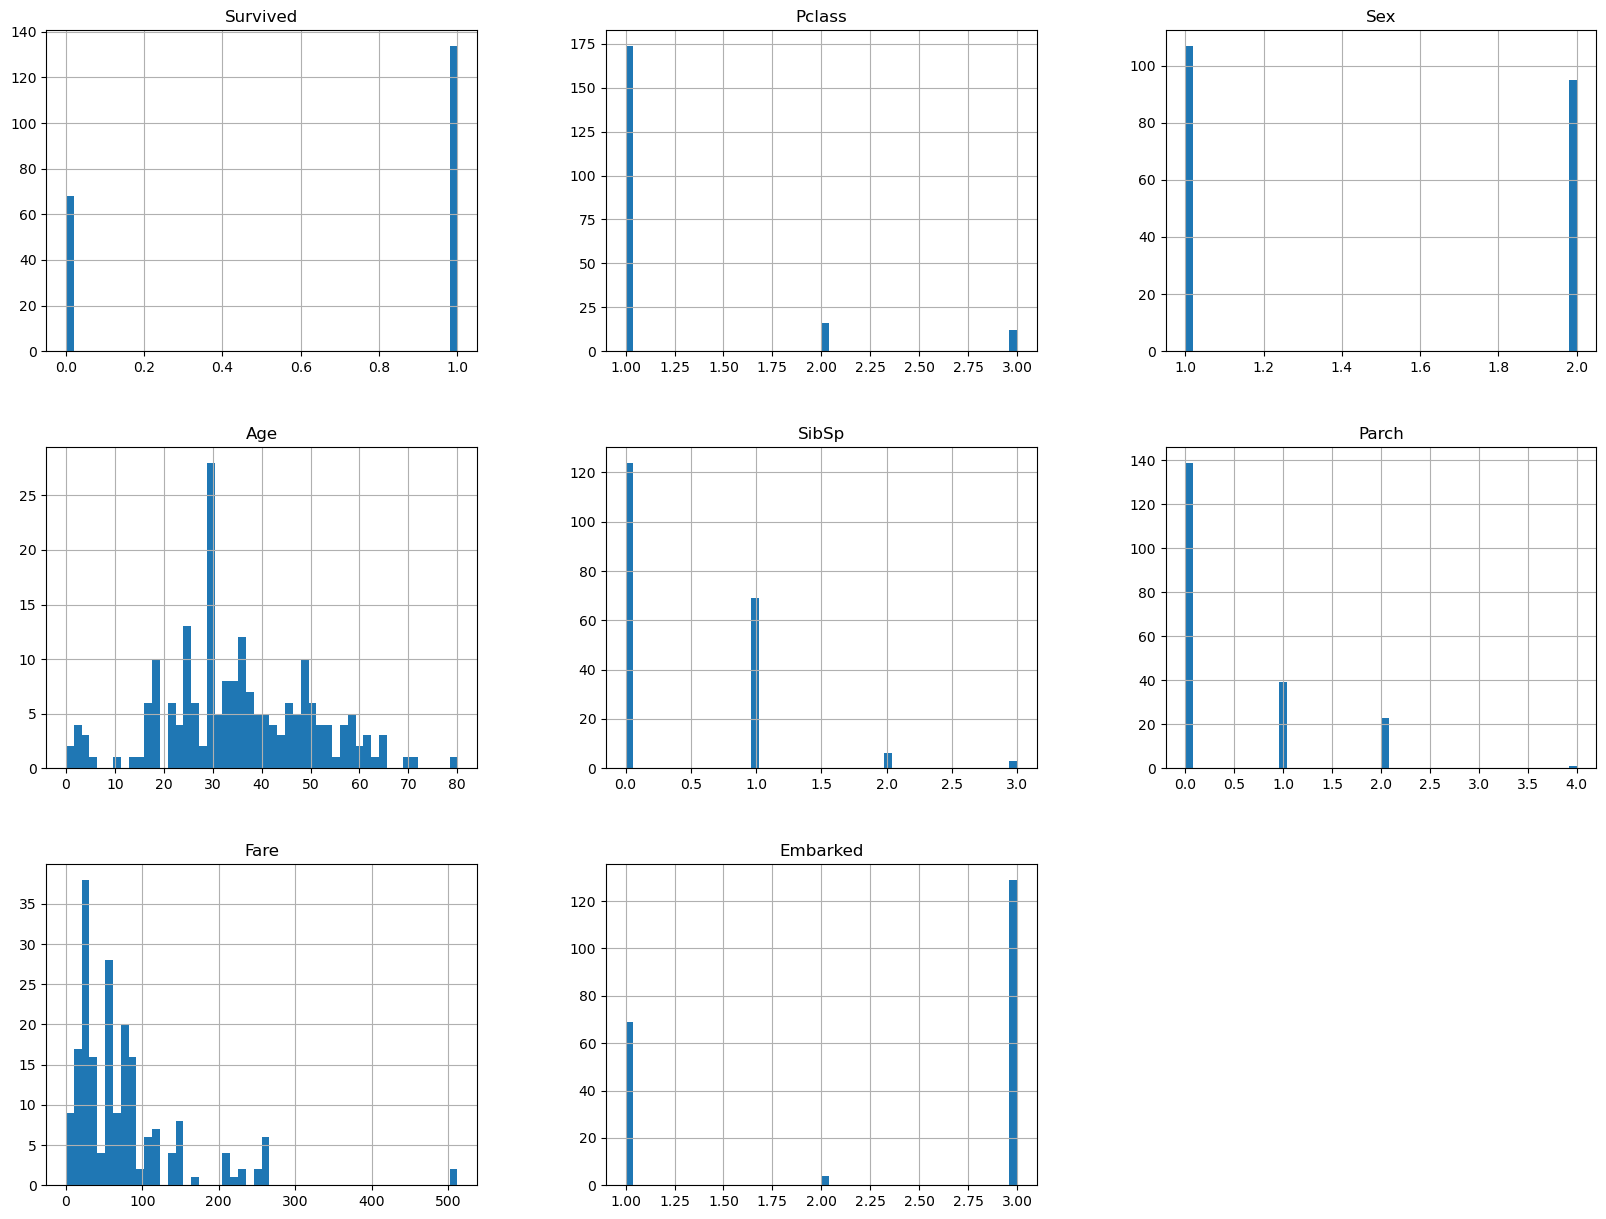

In [81]:
%matplotlib inline
# only in a Jupyter notebook
import matplotlib.pyplot as plt

train.hist(bins=50, figsize=(20,15))
plt.show()

### Data cleaning

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    int64  
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 69.5 KB


In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 26.2 KB


In [60]:
tr = train.Age.mean()
ts = test.Age.mean()

In [61]:
train['Age'].fillna(tr, inplace=True)
test['Age'].fillna(ts, inplace=True)

In [62]:
fs = test.Fare.mean()
test['Fare'].fillna(fs, inplace=True)

In [63]:
train.dropna(inplace=True)

In [64]:
train.drop(columns=['PassengerId','Name', 'Ticket','Cabin'], inplace=True)
test.drop(columns=['PassengerId','Name', 'Ticket','Cabin'], inplace=True)

In [65]:
train['Embarked'].replace('C', 1, inplace=True)
train['Embarked'].replace('Q', 2, inplace=True)
train['Embarked'].replace('S', 3, inplace=True)

In [66]:
test['Embarked'].replace('C', 1, inplace=True)
test['Embarked'].replace('Q', 2, inplace=True)
test['Embarked'].replace('S', 3, inplace=True)

In [67]:
train['Sex'].replace('male', 1, inplace=True)
train['Sex'].replace('female', 2, inplace=True)

In [68]:
test['Sex'].replace('male', 1, inplace=True)
test['Sex'].replace('female', 2, inplace=True)

In [69]:
train['Age'] = train['Age'].astype('int')
test['Age'] = test['Age'].astype('int')

In [70]:
train['Embarked'] = train['Embarked'].astype('int')

### Train Test Split

In [75]:
X_train = train.drop(columns=['Survived'])
y_train = train['Survived']

In [76]:
X_test = test
y_test = gender['Survived']

In [82]:
corr_matrix = train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Sex         0.545297
SibSp       0.138202
Fare        0.128261
Parch       0.042456
Pclass     -0.030513
Embarked   -0.130910
Age        -0.230443
Name: Survived, dtype: float64

### SGDClassifier

In [164]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

SGDClassifier()

In [165]:
print("Classification Score is: " + str(sgd_clf.score(X_test, y_test)))

Classification Score is: 0.7727272727272727


In [166]:
y_pred = sgd_clf.predict(X_test)

In [167]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train, cv=10, scoring="accuracy")

array([0.66666667, 0.33333333, 0.7       , 0.8       , 0.65      ,
       0.6       , 0.6       , 0.55      , 0.65      , 0.35      ])

In [168]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[194,  72],
       [ 23, 129]])

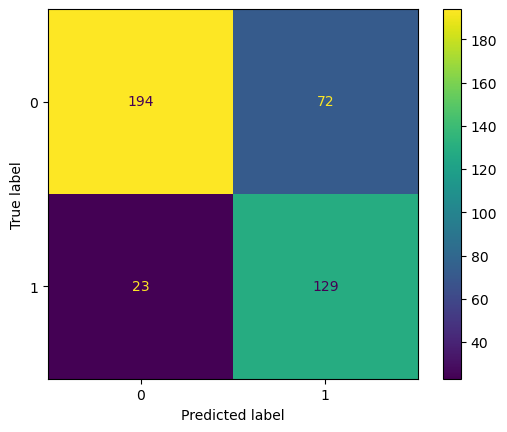

In [169]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=sgd_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_clf.classes_)
disp.plot()
plt.show()

In [170]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred)

0.6417910447761194

In [171]:
recall_score(y_test, y_pred)

0.8486842105263158

In [172]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.7308781869688386

### RandomForest classifier

In [248]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [249]:
from sklearn import metrics

y_pred2 = forest_clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.6578947368421053


In [250]:
cross_val_score(forest_clf, X_train, y_train, cv=5, scoring="accuracy")

array([0.73170732, 0.75609756, 0.775     , 0.625     , 0.825     ])

In [251]:
confusion_matrix(y_test, y_pred2)

array([[165, 101],
       [ 42, 110]])

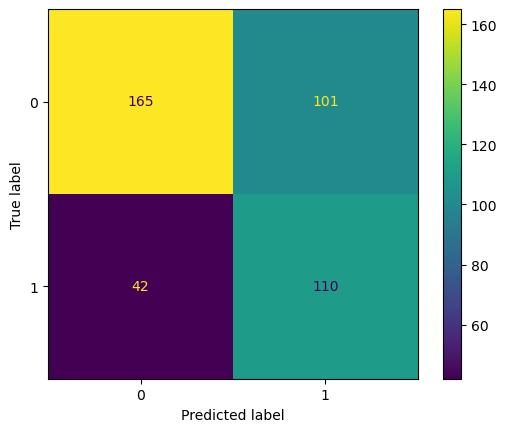

In [252]:
cm2 = confusion_matrix(y_test, y_pred2, labels=forest_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=forest_clf.classes_)
disp.plot()
plt.show()

In [254]:
precision_score(y_test, y_pred2)

0.5213270142180095

In [255]:
recall_score(y_test, y_pred2)

0.7236842105263158

In [256]:
f1_score(y_test, y_pred2)

0.6060606060606062

### KNeighborsClassifier

In [264]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [265]:
y_pred3 = knn_clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.49282296650717705


In [266]:
cross_val_score(knn_clf, X_train, y_train, cv=5, scoring="accuracy")

array([0.58536585, 0.7804878 , 0.65      , 0.6       , 0.6       ])

In [267]:
confusion_matrix(y_test, y_pred3)

array([[ 82, 184],
       [ 28, 124]])

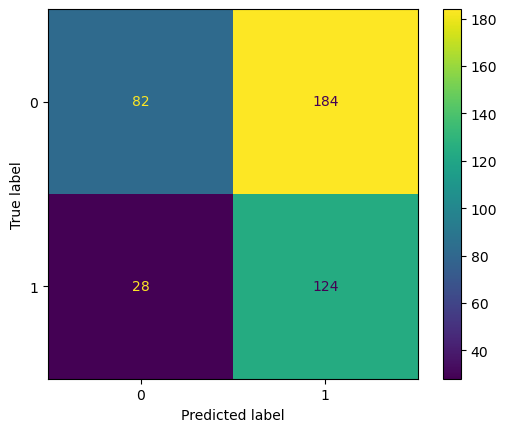

In [268]:
cm3 = confusion_matrix(y_test, y_pred3, labels=knn_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=knn_clf.classes_)
disp.plot()
plt.show()

In [263]:
precision_score(y_test, y_pred3)

0.4025974025974026

In [260]:
recall_score(y_test, y_pred3)

0.8157894736842105

In [262]:
f1_score(y_test, y_pred3)

0.5391304347826087

### Logistic Regression

In [276]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/home/user/.conda/envs/new_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [277]:
y_pred4 = log_reg.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred4))

Accuracy: 0.916267942583732


In [279]:
cross_val_score(log_reg, X_train, y_train, cv=5, scoring="accuracy")

/home/user/.conda/envs/new_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/user/.conda/envs/new_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

array([0.80487805, 0.7804878 , 0.775     , 0.65      , 0.725     ])

In [282]:
confusion_matrix(y_test, y_pred4)

array([[232,  34],
       [  1, 151]])

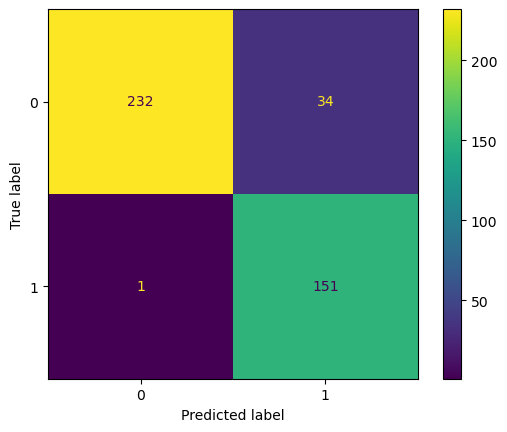

In [283]:
cm4 = confusion_matrix(y_test, y_pred4, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=log_reg.classes_)
disp.plot()
plt.show()

In [330]:
precision_score(y_test, y_pred4), recall_score(y_test, y_pred4), f1_score(y_test, y_pred4)

(0.8162162162162162, 0.993421052631579, 0.8961424332344213)

### Sofmax Regression

In [323]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=20)
softmax_reg.fit(X_train, y_train)

/home/user/.conda/envs/new_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=20, multi_class='multinomial')

In [324]:
y_pred5 = softmax_reg.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred5))

Accuracy: 0.9354066985645934


In [328]:
confusion_matrix(y_test, y_pred5)

array([[240,  26],
       [  1, 151]])

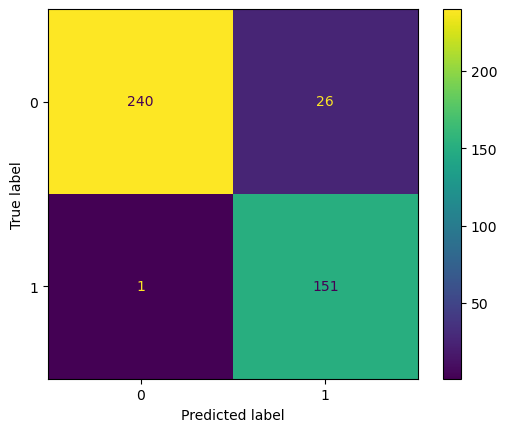

In [329]:
cm5 = confusion_matrix(y_test, y_pred5, labels=softmax_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels=softmax_reg.classes_)
disp.plot()
plt.show()

In [332]:
precision_score(y_test, y_pred5), recall_score(y_test, y_pred5), f1_score(y_test, y_pred5)

(0.8531073446327684, 0.993421052631579, 0.9179331306990882)

The model that reached the best scores is the multi logistic regression model.